In [1]:
import os 
os.chdir("../")

In [2]:
import pandas as pd
from scripts.feature_engineering import compute_customer_metrics, extract_transaction_features, encode_categorical_columns, scale_numerical_columns
from scripts.Default_estimator_WoE import calculate_rfms, create_default_estimator, visualize_rfms, woe_binning


In [3]:
df = pd.read_csv("data/data.csv")

In [4]:
aggregate_features = compute_customer_metrics(df)

In [5]:
merged_df = pd.merge(df, aggregate_features , on = 'CustomerId')

In [6]:
df = merged_df

In [7]:
extracted_features = extract_transaction_features(df)

In [8]:
columns_to_one_hot_encode = ["CurrencyCode", "ProviderId", "ProductId", "ProductCategory", "ChannelId"]

# Apply One-Hot Encoding to specified columns
encoded_df = encode_categorical_columns(df, columns_to_one_hot_encode, encoding_type='onehot')
print("One-Hot Encoded DataFrame:")
print(encoded_df)




One-Hot Encoded DataFrame:
              TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId  CountryCode   Amount  Value  \
0       SubscriptionId_887  CustomerId_4406          256   1000.0   1000   
1      SubscriptionId_3829  CustomerId_4406          256    -20.

In [21]:
df = scale_numerical_columns(df,  ["Amount", "Value","TotalTransactionAmount", "AverageTransactionAmount", "TransactionCount", "TransactionStdDev" ], "normalize")

In [9]:
df.to_csv("data/cleaned_data.csv")

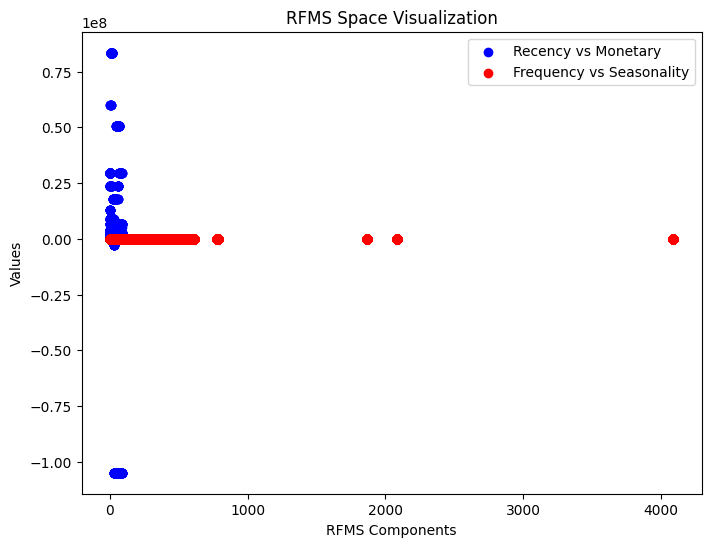

           TransactionId  RFMS_Score Label        WoE
0    TransactionId_76871   110141.75  Good  11.560689
1    TransactionId_73770   110141.75  Good  11.560689
2    TransactionId_26203     1103.00  Good  -2.815811
3      TransactionId_380   228866.20  Good  11.557874
4    TransactionId_28195   228866.20  Good  11.557874
5    TransactionId_23223     2102.00  Good  -2.815811
6   TransactionId_118063    93530.00  Good  11.560689
7   TransactionId_100640    93530.00  Good  11.560689
8    TransactionId_51905     8165.00  Good  -2.815811
9   TransactionId_130161    13896.00  Good  11.556830
10   TransactionId_51800    10813.00  Good  -2.815811
11   TransactionId_33857    10813.00  Good  -2.815811
12   TransactionId_94963    13896.00  Good  11.556830
13  TransactionId_104687    13896.00  Good  11.556830
14   TransactionId_86903    13896.00  Good  11.556830
15  TransactionId_118831    13896.00  Good  11.556830
16  TransactionId_122975   159848.00  Good  11.555156
17   TransactionId_98367   1

c:\Users\Kalea\Desktop\week 6\Credit_Scoring_Project\scripts\Default_estimator_WoE.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')


In [10]:
df = calculate_rfms(df)
visualize_rfms(df)
df = create_default_estimator(df)

# Perform WoE binning on 'TotalTransactionAmount' as an example
df = woe_binning(df, 'Label', 'TotalTransactionAmount')

# Display resulting dataframe with calculated RFMS, Labels, and WoE
print(df[['TransactionId', 'RFMS_Score', 'Label', 'WoE']].head(20))


In [12]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionYear,Recency,Frequency,Monetary,Seasonality,RFMS_Score,RFMS_Cluster,Label,bin,WoE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2018,90,119,109921.75,11,110141.75,0,Good,"(79000.0, 128387.0]",11.560689
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018,90,119,109921.75,11,110141.75,0,Good,"(79000.0, 128387.0]",11.560689
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2018,90,2,1000.00,11,1103.00,0,Good,"(-104900000.001, 12600.0]",-2.815811
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2018,90,38,228727.20,11,228866.20,0,Good,"(201511.3, 296471.0]",11.557874
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018,90,38,228727.20,11,228866.20,0,Good,"(201511.3, 296471.0]",11.557874
